## Overview

Implementation of three classification algorithms using the CRISP-DM methodology on a heart disease dataset. 

This project entails applying the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework to develop and implement three different classification algorithms on a heart disease dataset. CRISP-DM, a well-known and systematic approach to data mining, provides a structured process consisting of six key phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 

By following these phases, this project ensures a comprehensive and methodical analysis. Each step, from understanding the domain-specific problem of predicting heart disease to cleaning and preparing the dataset, is meticulously carried out. The classification algorithms are then selected, trained, and tuned to maximize predictive performance. The resulting models are evaluated against key performance metrics to identify the best approach for accurately predicting heart disease outcomes.

## Business Understanding

***Note : Information collected from kaggle dataset and ChatGPT***

•The aim of this project is to develop an accurate machine learning model for early detection of cardiac diseases, improving diagnostic efficiency and supporting healthcare professionals.

•	Goals include identifying key risk factors, improving existing diagnostic methods and integrating the model into clinical practice.

•	The project focuses on real-world implementation and actionable patient insights.

## Data Understanding

***Note : Information collected from kaggle dataset and ChatGPT***

Heart disease dataset has been created with the combination of two medical tests :

1. Cholesterol level (chol)
2. Fasting blood sugar (fsb)

Dataset includes 14 features which help us detemine the patient has heart disease.

1. ***age*** : Age of the patient.

2. ***sex*** : Gender of the patient (e.g., 1 = male, 0 = female).

3. ***cp*** : chest pain type:
   1. Value 0: ***typical angina*** : **Typical angina** refers to chest pain or discomfort caused by reduced blood flow to the heart, often triggered by physical exertion.

   2. Value 1: ***atypical angina*** : **Atypical angina** involves varied chest pain, may not follow typical patterns, and can be linked to multiple underlying causes.

   3. Value 2: ***non-anginal pain*** : **Non-anginal** pain is chest pain not related to heart issues, often caused by gastrointestinal, musculoskeletal, or anxiety-related factors.

   4. Value 3: ***asymptomatic*** : **Asymptomatic** chest pain refers to chest discomfort or abnormal heart conditions without noticeable symptoms, often discovered during medical evaluations.

4. ***trestbps*** : resting blood pressure (in mm Hg on admission to the hospital)

5. ***chol*** : serum cholestoral in mg/dl

6. ***fsb*** : (fasting blood sugar > 120 mg/dl, 1 = True and 0 = False)

7. ***restecg*** : resting electrocardiographic results
   1. Value 0: normal

   2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) ST-T wave abnormality on ECG suggests potential heart ischemia, electrolyte imbalances, or other heart conditions requiring further evaluation.

   3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (Estes' criteria for LVH uses ECG measurements to detect left ventricular thickening, often caused by hypertension or heart disease.)

8. ***thalach*** : maximum heart rate achieved

9. ***exang*** : exercise induced angina (Exercise-induced angina is chest pain triggered by physical activity, usually caused by reduced blood flow to the heart muscle.)
   1. "1 = Yes"
   2. "0 = No"

10. ***oldpeak*** : ST depression induced by exercise relative to rest

11. ***slope*** : the slope of the peak exercise ST segment
    1. Value 0: upsloping

    2. Value 1: flat

    3. Value 2: downsloping

12. ***ca*** : number of major vessels (0-4) colored by flourosopy.

13. ***thal(Thalassemia)*** : A genetic blood disorder affecting red blood cell production, which may be associated with certain cardiovascular risks.
    1. 0 = error (in the original dataset 0 maps to NaN's).

    2. 1 = Normal thallium scan (no significant coronary artery disease).

    3. 2 = Fixed defect, indicating a scar in the heart muscle (may suggest past heart attack).

    4. 3 = Reversible defect, suggesting ischemia or reduced blood flow due to coronary artery blockage, which can be treated or improved with interventions.

14. ***target*** : (0 = no disease, 1 = disease)

In [181]:
%pip install seaborn
%pip install scipy

In [182]:
#The code suppresses warning messages in Python, preventing them from being displayed during execution to create cleaner output.

import warnings
warnings.filterwarnings('ignore')

### Start of Exploratory Data Analysis

In [183]:
# Visualizing a CSV file's rows and columns helps understand its structure, including the number of entries, column names, and data types.

from pandas import read_csv
data = read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [184]:
# data.shape returns a tuple indicating the number of rows and columns in the dataset, providing its dimensional structure.
data.shape

(1025, 14)

In [185]:
# data.describe() generates summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [186]:
#for better understanding of columns (renamining the columns)
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [187]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [188]:
#Count missing values in each column to see which columns have missing data.
data.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

<AxesSubplot:>

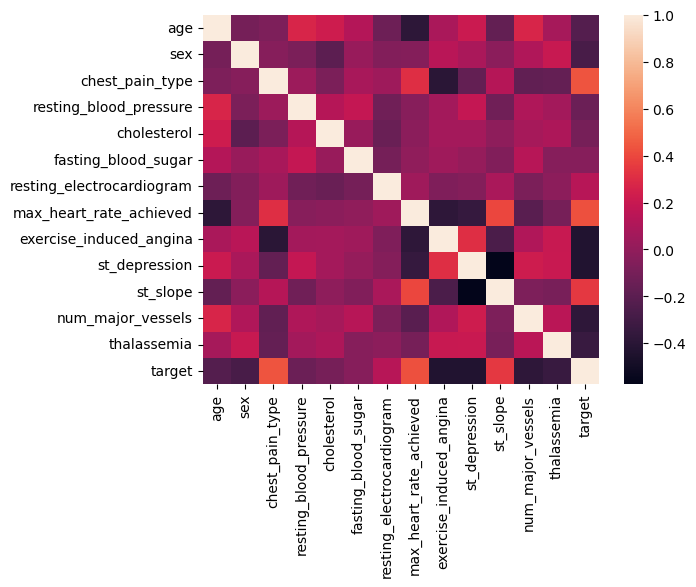

In [189]:
# with the help of heatmap and correlation matrix we can identify potential columns required for data preparation.
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

In [190]:
# Displaying the correlation coefficient between columns and the target variable to assess their relationships.
import pandas as pd
import numpy as np
for column in data.columns:
    values = np.corrcoef(data[column],data['target'])
    print(f"{column} and target = {values[0][1]}") 

age and target = -0.22932355126760903
sex and target = -0.2795007572922575
chest_pain_type and target = 0.43485425005273953
resting_blood_pressure and target = -0.13877173373730062
cholesterol and target = -0.09996559423254033
fasting_blood_sugar and target = -0.04116354746465085
resting_electrocardiogram and target = 0.1344682087390871
max_heart_rate_achieved and target = 0.4228954964828679
exercise_induced_angina and target = -0.4380285500558446
st_depression and target = -0.43844127011194073
st_slope and target = 0.3455117514359967
num_major_vessels and target = -0.38208528903866956
thalassemia and target = -0.3378381504571833
target and target = 1.0


Based on the output of the correlation coefficients between each feature and the target, we can analyze which columns are most relevant for modeling the dataset, specifically in the context of predicting heart disease (assuming the target is heart disease diagnosis). The closer the correlation is to +1 or -1, the stronger the relationship between that feature and the target, and typically, those features are more useful for prediction.

with proper analysis of the data and using correlation matrix we can conclude that
1. key features for modelling are : 'exercise_induced_angina (Correlation = -0.438)', 'st_depression (Correlation = -0.438)', 'chest_pain_type (Correlation = 0.435)', 'max_heart_rate_achieved (Correlation = 0.423)', 'num_major_vessels (Correlation = -0.382)'.

2. moderate features for modelling are: 'age (Correlation = -0.229)', 'sex (Correlation = -0.279)', 'resting_blood_pressure (Correlation = -0.139)', 'cholesterol (Correlation = -0.1)', 'thalassemia (Correlation = -0.338)'

3. least useful features for modelling are: 'fasting_blood_sugar (Correlation = -0.041)', 'resting_electrocardiogram (Correlation = 0.134)'



### End of Exploratory Data Analysis

## Data Preparation

After thorough analysis of correlation matrix and 'np.corrcoef' we came to the conclusion that columns 'resting_blood_sugar', 'cholestrol', 'fasting_blood_sugar', 'resting_electrocardiogram' have least significance on target variable hence dropping the columns form the dataset.

In [191]:
data.drop(['resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_electrocardiogram'] , axis=1, inplace=True)
data.head()

,age,sex,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,168,0,1.0,2,2,3,0
1,53,1,0,155,1,3.1,0,0,3,0
2,70,1,0,125,1,2.6,0,0,3,0
3,61,1,0,161,0,0.0,2,1,3,0
4,62,0,0,106,0,1.9,1,3,2,0


1. splitting the columns into independent and dependent
2. here we splitted the data into 3 parts X = 'age', 'sex' this columns does not needed to be normalize as it represents a physical entity and we will not apply normalization on it.
3. Y = 'target' 
4. data = remaning columns in the dataset after dropping the least significants. 

In [192]:
X = data[['age', 'sex']]
Y = data[['target']]
data = data.drop(['age','sex','target'],axis= 1)

In [193]:
# scipy.stats.skew calculates the skewness (asymmetry) of a data distribution, indicating whether it's positively or negatively skewed.
from scipy.stats import skew

1. if the skewness is between (-0.5 to 0.5) the approximately symmetric
2. if the skewness is between (0.5 to 1.0 (Positive skewed)) or (-0.5 to -1.0 (Negative skewed)) the data has moderate skewness.
3. if the skewness is greater than 1.0 (Higly Positive skewed) or less than -1.0 the data is (Highly Negative skewed)

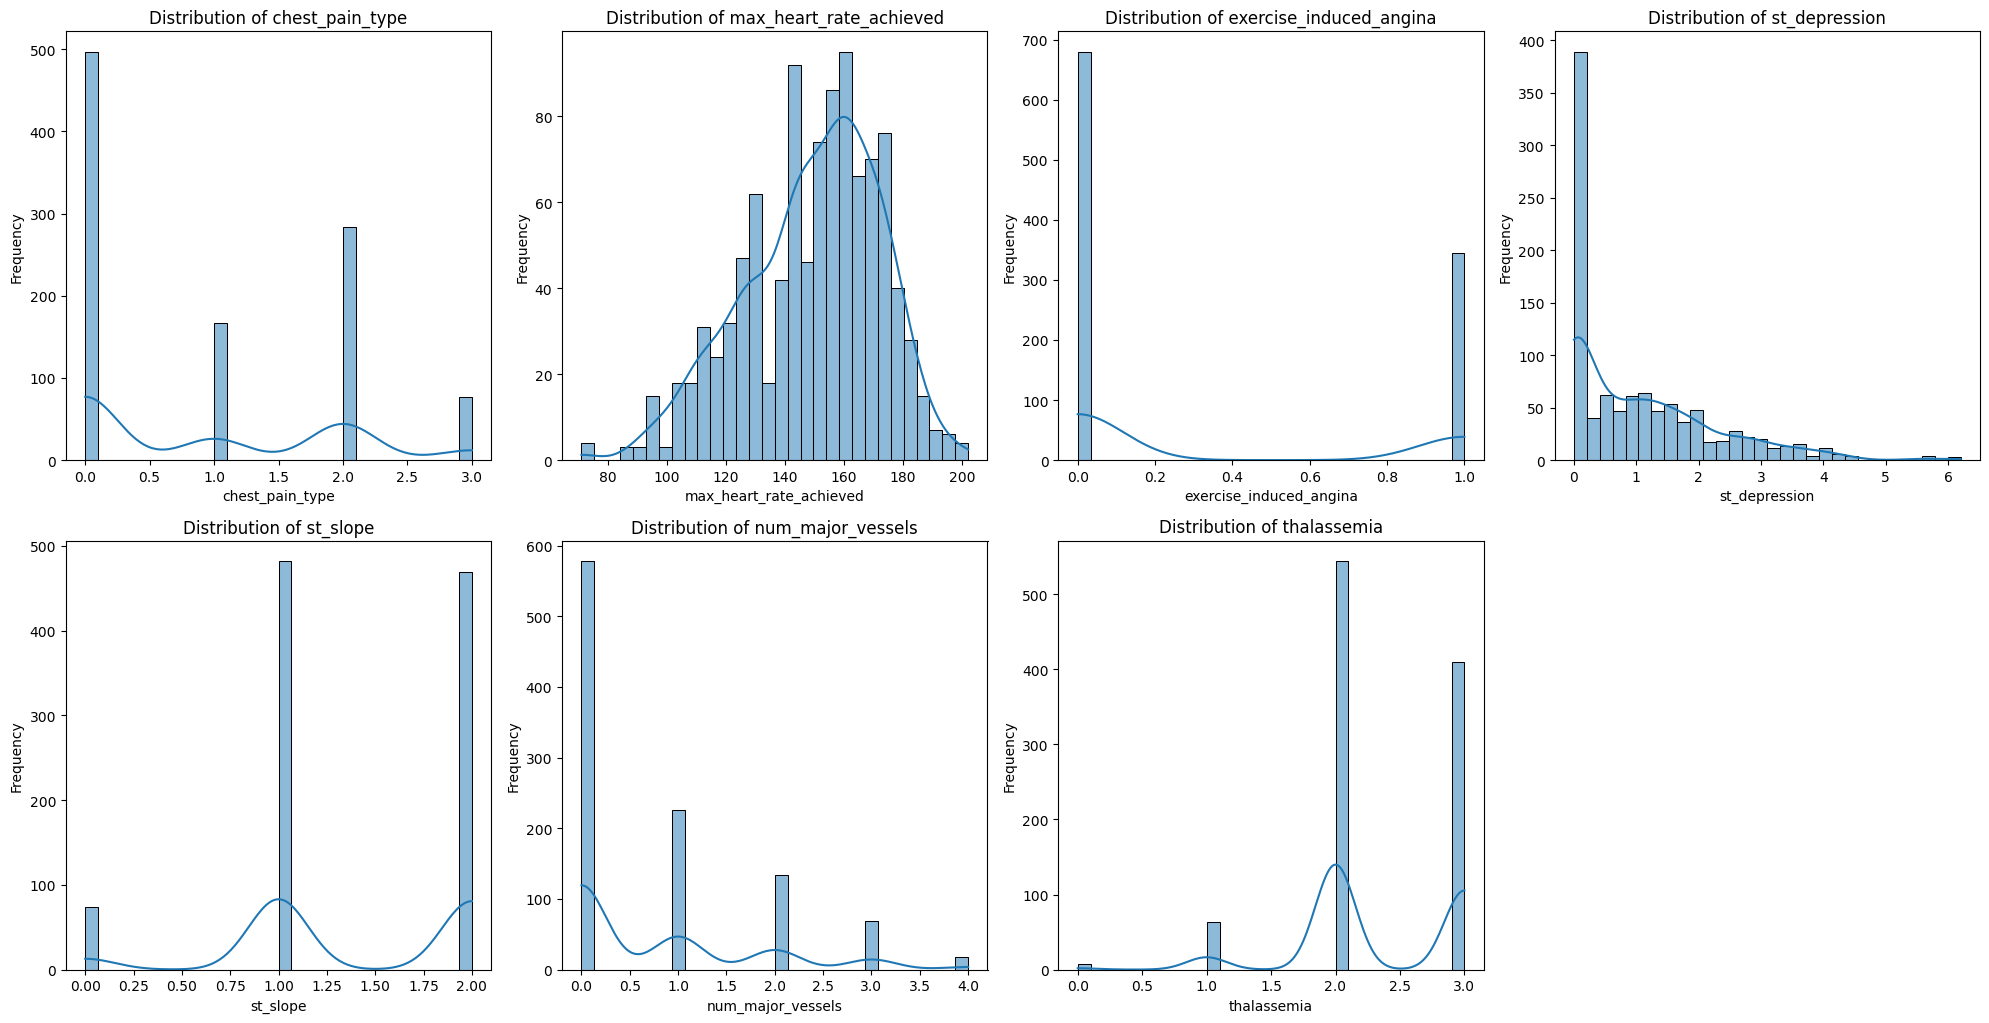

In [194]:
# Plotting a skew plot to visualizes data distribution asymmetry, showing positive skew (right) or negative skew (left) patterns.
import seaborn as sns
import matplotlib.pyplot as plt
data_columns = ['chest_pain_type', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope',
           'num_major_vessels', 'thalassemia']

plt.figure(figsize=(20, 15))

for i, column in enumerate(data_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [195]:
# categorizing each column as per their skewness.

data_columns = ['chest_pain_type', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope',
           'num_major_vessels', 'thalassemia']

for column in data_columns:
    if data[column].skew() > -0.5 and data[column].skew() < 0.5:
        print(f"{column}: {data[column].skew()}     (Approximate Skewed)")
    elif data[column].skew() > 0.5 and data[column].skew()  < 1:
        print(f"{column}: {data[column].skew()}     (Positively Skewed)")
    elif data[column].skew() > -1 and data[column].skew() < -0.5:
        print(f"{column}: {data[column].skew()}     (Negatively Skewed)")
    elif data[column].skew() > 1:
        print(f"{column}: {data[column].skew()}     (Highly Positive Skewed)")
    else:
        print(f"{column}: {data[column].skew()}     (Highly Negative Skewed)")

chest_pain_type: 0.5294552058584099     (Positively Skewed)
max_heart_rate_achieved: -0.5137771771417209     (Negatively Skewed)
exercise_induced_angina: 0.692655170469321     (Positively Skewed)
st_depression: 1.2108993882065326     (Highly Positive Skewed)
st_slope: -0.4791344197425813     (Approximate Skewed)
num_major_vessels: 1.2611886429097716     (Highly Positive Skewed)
thalassemia: -0.5243897710407986     (Negatively Skewed)


In [196]:
# Different columns may have varying skewness, requiring distinct transformation techniques to reduce skew and normalize data distribution.

import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer

#chest_pain_type
pt = PowerTransformer(method = 'yeo-johnson')
data['chest_pain_type'] = pt.fit_transform(data[['chest_pain_type']])
data['chest_pain_type'].skew()

0.13641566563620203

In [197]:
#max_heart_rate_achieved

# data['max_heart_rate_achieved'] = np.cbrt(data['max_heart_rate_achieved'])
# data['max_heart_rate_achieved'],_ = stats.boxcox(data['max_heart_rate_achieved']+1) 
pt = PowerTransformer(method = 'yeo-johnson')
data['max_heart_rate_achieved'] = pt.fit_transform(data[['max_heart_rate_achieved']])
data['max_heart_rate_achieved'].skew()

-0.07154114930598422

In [198]:
# st_depression

# data['st_depression'] = 1/ data['st_depression']
pt = PowerTransformer(method = 'yeo-johnson')
data['st_depression'] = pt.fit_transform(data[['st_depression']])
# data['st_depression'] = np.sqrt(data['st_depression'])
#data['st_depression'],_ = stats.boxcox(data['st_depression']+1)
# data['st_depression'] = np.log(data['st_depression'] + 1)
data['st_depression'].skew()

0.11061261711623786

In [199]:
#num_major_vessels

#data['num_major_vessels'] = 1/ data['num_major_vessels']
pt = PowerTransformer(method = 'yeo-johnson')
data['num_major_vessels'] = pt.fit_transform(data[['num_major_vessels']])
# data['num_major_vessels'] = np.cbrt(data['num_major_vessels'])
# data['num_major_vessels'],_ = stats.boxcox(data['num_major_vessels']+1)
# data['num_major_vessels'] = np.log(data['num_major_vessels'] + 1)
data['num_major_vessels'].skew()

0.3855781485623359

In [200]:
# thalassemia

# data['thalassemia'] = 1/ data['thalassemia']
pt = PowerTransformer(method = 'yeo-johnson')
data['thalassemia'] = pt.fit_transform(data[['thalassemia']])
# data['thalassemia'] = np.sqrt(data['thalassemia'])
# data['thalassemia'],_ = stats.boxcox(data['thalassemia']+1)
# data['thalassemia'] = np.log(data['thalassemia'] + 1)
data['thalassemia'].skew()

-0.09832628334150166

In [201]:
# After transforming the data, its skewness is re-evaluated to ensure the distribution is more balanced and normalized.

data_columns = ['chest_pain_type', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope',
           'num_major_vessels', 'thalassemia']

for column in data_columns:
    if data[column].skew() > -0.5 and data[column].skew() < 0.5:
        print(f"{column}: {data[column].skew()}     (Approximate Skewed)")
    elif data[column].skew() > 0.5 and data[column].skew()  < 1:
        print(f"{column}: {data[column].skew()}     (Positively Skewed)")
    elif data[column].skew() > -1 and data[column].skew() < -0.5:
        print(f"{column}: {data[column].skew()}     (Negatively Skewed)")
    elif data[column].skew() > 1:
        print(f"{column}: {data[column].skew()}     (Highly Positive Skewed)")
    else:
        print(f"{column}: {data[column].skew()}     (Highly Negative Skewed)")

chest_pain_type: 0.13641566563620203     (Approximate Skewed)
max_heart_rate_achieved: -0.07154114930598422     (Approximate Skewed)
exercise_induced_angina: 0.692655170469321     (Positively Skewed)
st_depression: 0.11061261711623786     (Approximate Skewed)
st_slope: -0.4791344197425813     (Approximate Skewed)
num_major_vessels: 0.3855781485623359     (Approximate Skewed)
thalassemia: -0.09832628334150166     (Approximate Skewed)


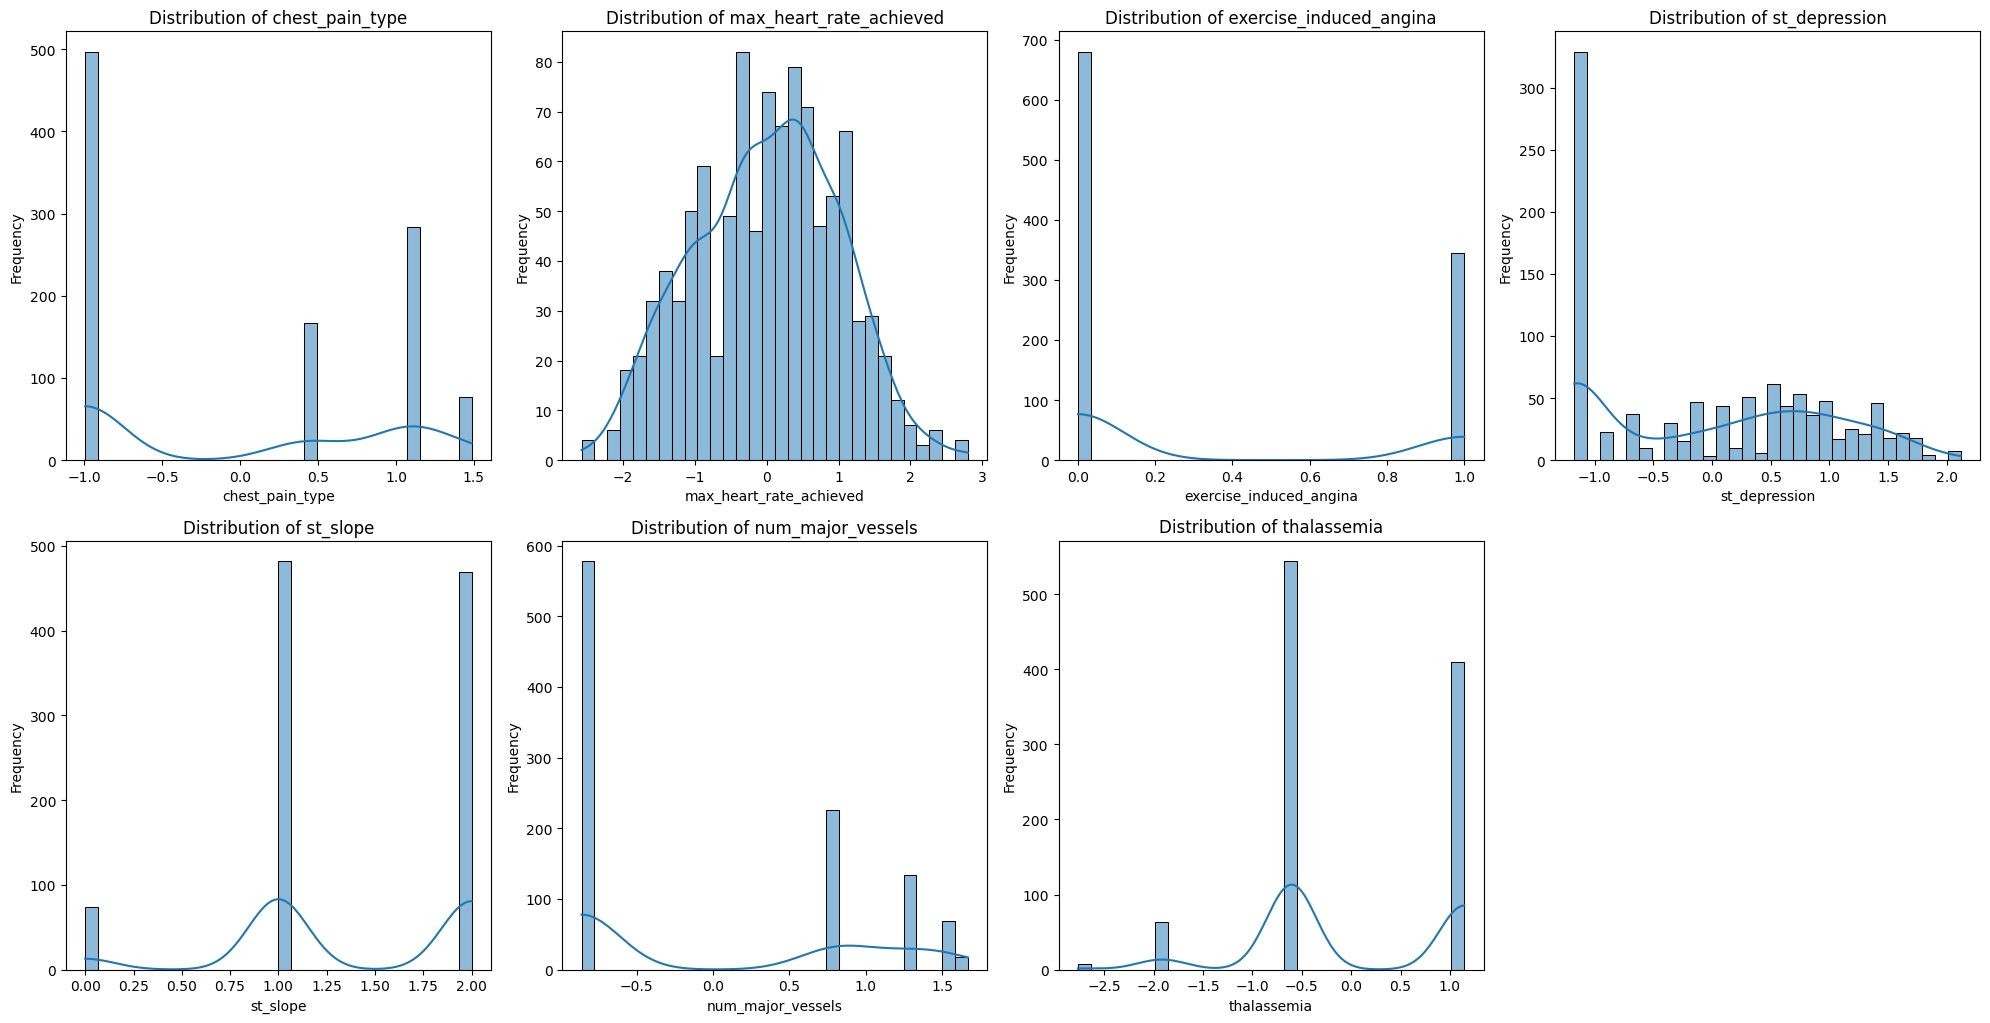

In [202]:
#plotting the skew plot after transforming the data, to ensure the distribution is more balanced and normalized.
import seaborn as sns
import matplotlib.pyplot as plt
data_columns = ['chest_pain_type', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope',
           'num_major_vessels', 'thalassemia']

plt.figure(figsize=(20, 15))

for i, column in enumerate(data_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [203]:
# MinMax normalization is applied to the skewed data, scaling it to a fixed range, typically between 0 and 1.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
ds = ss.fit_transform(data)
dp = pd.DataFrame(ds)
dp.columns = data.columns
data = dp
data.head()

,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,0.0,0.632111,0.0,0.455361,1.0,0.859237,1.000000
1,0.0,0.512213,1.0,0.798600,0.0,0.000000,1.000000
2,0.0,0.278136,1.0,0.744358,0.0,0.000000,1.000000
3,0.0,0.566144,0.0,0.000000,1.0,0.664634,1.000000
4,0.0,0.159821,0.0,0.646834,0.5,0.949112,0.553048


In [204]:
# After applying normalization, the data's skewness is reassessed to ensure the distribution is more balanced and suitable for modelling.

data_columns = ['chest_pain_type', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope',
           'num_major_vessels', 'thalassemia']

for column in data_columns:
    if data[column].skew() > -0.5 and data[column].skew() < 0.5:
        print(f"{column}: {data[column].skew()}     (Approximate Skewed)")
    elif data[column].skew() > 0.5 and data[column].skew()  < 1:
        print(f"{column}: {data[column].skew()}     (Positively Skewed)")
    elif data[column].skew() > -1 and data[column].skew() < -0.5:
        print(f"{column}: {data[column].skew()}     (Negatively Skewed)")
    elif data[column].skew() > 1:
        print(f"{column}: {data[column].skew()}     (Highly Positive Skewed)")
    else:
        print(f"{column}: {data[column].skew()}     (Highly Negative Skewed)")

chest_pain_type: 0.13641566563620186     (Approximate Skewed)
max_heart_rate_achieved: -0.07154114930598424     (Approximate Skewed)
exercise_induced_angina: 0.692655170469321     (Positively Skewed)
st_depression: 0.11061261711623803     (Approximate Skewed)
st_slope: -0.4791344197425813     (Approximate Skewed)
num_major_vessels: 0.38557814856233585     (Approximate Skewed)
thalassemia: -0.09832628334149925     (Approximate Skewed)


In [205]:
# concating the X and data
data = pd.concat([X,data],axis=1)
data.head()

,age,sex,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,52,1,0.0,0.632111,0.0,0.455361,1.0,0.859237,1.000000
1,53,1,0.0,0.512213,1.0,0.798600,0.0,0.000000,1.000000
2,70,1,0.0,0.278136,1.0,0.744358,0.0,0.000000,1.000000
3,61,1,0.0,0.566144,0.0,0.000000,1.0,0.664634,1.000000
4,62,0,0.0,0.159821,0.0,0.646834,0.5,0.949112,0.553048


## Data Modelling

In [206]:
#This code splits data into training and testing sets (80%/20%) for model training, using a fixed random seed for reproducibility.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2, random_state=123456)
X_train.head()

,age,sex,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
339,60,1,0.000000,0.419549,1.0,0.553321,1.0,0.664634,1.000000
685,63,0,0.000000,0.503458,0.0,0.875477,0.5,0.949112,1.000000
425,51,0,0.000000,0.403557,1.0,0.507574,0.5,0.000000,1.000000
59,57,1,0.573864,0.594012,0.0,0.000000,1.0,0.664634,0.553048
670,61,0,0.000000,0.641804,0.0,0.000000,1.0,0.000000,0.553048


In [207]:
# Identifying class imbalances in the dataset to prevent model bias and ensure fair representation of all classes during training.
target_column = 'target'  


distribution = Y[target_column].value_counts()

# Print the counts of each class
print("Class distribution:")
print(distribution)

# Calculate the percentage distribution
print("\nPercentage distribution:")
print((distribution / len(data)) * 100)


Class distribution:
target
1    526
0    499
Name: count, dtype: int64

Percentage distribution:
target
1    51.317073
0    48.682927
Name: count, dtype: float64


In [208]:
#Logistic regression modelling

def logistic_regression():
    from sklearn.linear_model import LogisticRegressionCV
    model=LogisticRegressionCV(max_iter=1000)
    model.fit(X_train,Y_train)
    return model

In [209]:
# K-nearest neighbour modelling

def knn():
    from sklearn.neighbors import KNeighborsClassifier
    model=KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train,Y_train)
    return model

In [210]:
# Support vector machine modelling

def svm():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(X_train,Y_train)
    return model

In [211]:
# Creating instance of the model functions

model_lg=logistic_regression()
model_knn=knn()
model_svm=svm()

## Evaluation

In [212]:
# The code evaluates the model, providing metrics like accuracy, recall, and a confusion matrix to assess its performance.
def evaluate_model(model, model_name):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
    from numpy import mean
    Accuracy = []
    Recall = []

    y_pred = model.predict(X_test)
    yhat = []
    for i in y_pred:
        if i > 0.5:
          yhat.append(1)
        else:
            yhat.append(0)
    cm = confusion_matrix(Y_test, yhat)
    acc = accuracy_score(Y_test, yhat)
    re = recall_score(Y_test, yhat)
    pr = precision_score(Y_test, yhat)
    Accuracy.append(acc)
    Recall.append(re)
    print(f"<-------------------{model_name}------------------->")
    print('Confusion matrix:\n',cm)
    print('Recall: ',mean(Recall))       
    print(f"Accuracy of {model_name} is {mean(Accuracy) * 100}%")

In [213]:
evaluate_model(model_lg,"Logistic Regression")
evaluate_model(model_knn,"KNN")
evaluate_model(model_svm,"SVM")

<-------------------Logistic Regression------------------->
Confusion matrix:
 [[88 17]
 [14 86]]
Recall:  0.86
Accuracy of Logistic Regression is 84.8780487804878%
<-------------------KNN------------------->
Confusion matrix:
 [[ 99   6]
 [  0 100]]
Recall:  1.0
Accuracy of KNN is 97.07317073170731%
<-------------------SVM------------------->
Confusion matrix:
 [[82 23]
 [55 45]]
Recall:  0.45
Accuracy of SVM is 61.951219512195124%


## Deployment

In [214]:
# The code saves a trained KNN model to a file named `KNN_model.pkl` using Pickle for later reuse.
import pickle

with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(model_knn,file)
print('Model deployed')

Model deployed
